This is done on dummy dataset which includes timestamp, temperature, humidity, water level, nitrogen content, phosphorus content and potassium content of the soil of irrigation facility

Highest accuracy of models per objective
*   SVM-99.88% for prediction of water requirements
*   DTree and RF-99.997% for prediction of fan actuator on or off
*   KNN-99.994% for predicting soil quality
*   KNN-99.33% for crop recommendation
*   KNN- 99.88% for predicting optimal temperature






In [ ]:
import pandas as pd
df = pd.read_csv('IoTProcessed_Data (1).csv', usecols=['date','tempreature', 'humidity', 'water_level', 'N', 'P', 'K'])
print(df.head())

                  date  tempreature  humidity  water_level    N    P    K
0  2024-02-08 06:10:00           41        63          100  255  255  255
1  2024-02-08 06:15:00           41        59          100  255  255  255
2  2024-02-08 06:20:00           41        62          100  255  255  255
3  2024-02-08 06:05:00           40        60          100  255  255  255
4  2024-02-08 06:00:00           39        61          100  255  255  255


Arranging the dataset on the basis of timestamp

In [ ]:
df['date'] = pd.to_datetime(df['date'])
df.sort_values(by='date', inplace=True)
df.reset_index(drop=True, inplace=True)
print(df.head())

                 date  tempreature  humidity  water_level    N    P    K
0 2023-11-27 06:26:00           29        79          100  185  190  160
1 2023-11-27 06:31:00           29        78          100  185  190  160
2 2023-11-27 06:36:00           28        77          100  185  190  160
3 2023-11-27 06:41:00           28        75          100  185  190  160
4 2023-11-27 06:46:00           28        74          100  185  190  160


Handling missing values in the N, P, K columns

In [ ]:
import numpy as np
# Extract max values of N, P, K
max_N = df['N'].max()
max_P = df['P'].max()
max_K = df['K'].max()
print(f"Max N: {max_N}, Max P: {max_P}, Max K: {max_K}")


step = 5
N_range = np.arange(0, max_N + step, step)
P_range = np.arange(0, max_P + step, step)
K_range = np.arange(0, max_K + step, step)
# Generate all combinations using a meshgrid
from itertools import product
dummy_data = pd.DataFrame(product(N_range, P_range, K_range), columns=['N', 'P', 'K'])
print(f"Dummy data size: {dummy_data.shape}")
dummy_data.head()
dummy_data['tempreature'] = np.random.uniform(20, 35, size=len(dummy_data))
dummy_data['humidity'] = np.random.uniform(30, 90, size=len(dummy_data))


Max N: 255, Max P: 255, Max K: 259
Dummy data size: (143312, 3)


In [ ]:
# Ensure the columns match
df['label'] = df.get('label', 'real')  # if no label, add 'real'
combined_df = pd.concat([df, dummy_data], ignore_index=True)
print(f"Combined data shape: {combined_df.shape}")
combined_df.head()

Combined data shape: (181234, 8)


,date,tempreature,humidity,water_level,N,P,K,label
0,2023-11-27 06:26:00,29.0,79.0,100.0,185,190,160,real
1,2023-11-27 06:31:00,29.0,78.0,100.0,185,190,160,real
2,2023-11-27 06:36:00,28.0,77.0,100.0,185,190,160,real
3,2023-11-27 06:41:00,28.0,75.0,100.0,185,190,160,real
4,2023-11-27 06:46:00,28.0,74.0,100.0,185,190,160,real


Splitting the dataset into test, train and validation dataset

In [ ]:
from sklearn.model_selection import train_test_split
train_df, temp_df = train_test_split(combined_df, test_size=0.3, random_state=42, shuffle=True)
val_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42, shuffle=True)

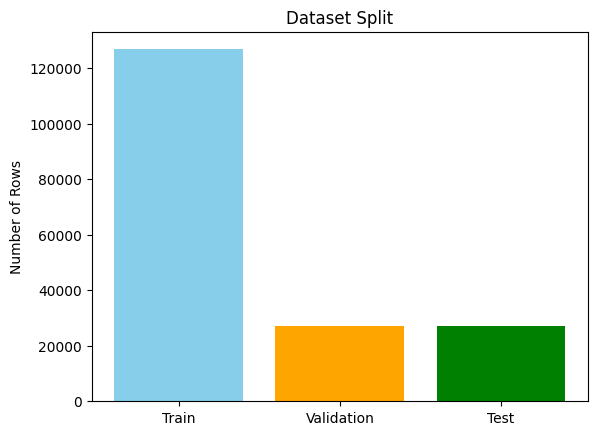

In [ ]:
import matplotlib.pyplot as plt
sizes = [len(train_df), len(val_df), len(test_df)]
labels = ['Train', 'Validation', 'Test']
plt.bar(labels, sizes, color=['skyblue', 'orange', 'green'])
plt.title('Dataset Split')
plt.ylabel('Number of Rows')
plt.show()

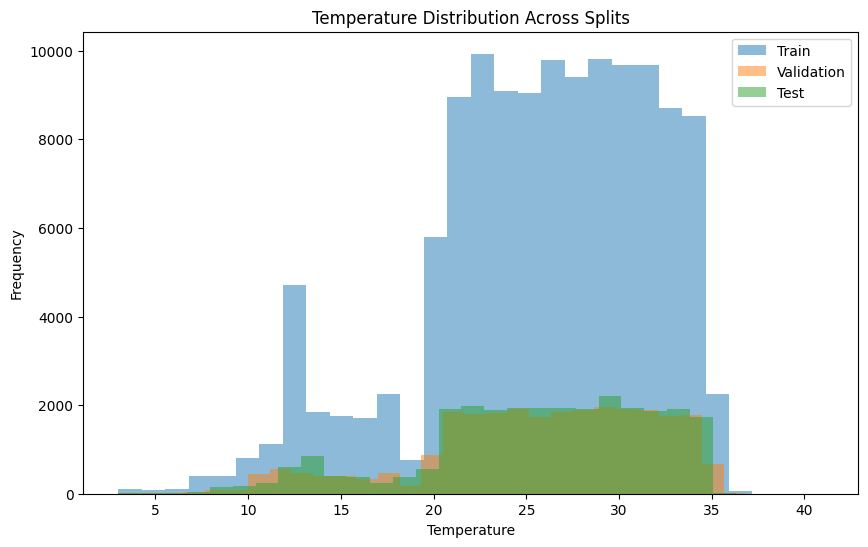

In [ ]:
#Visualize data distribution of 'tempreature' column
plt.figure(figsize=(10, 6))
plt.hist(train_df['tempreature'], bins=30, alpha=0.5, label='Train')
plt.hist(val_df['tempreature'], bins=30, alpha=0.5, label='Validation')
plt.hist(test_df['tempreature'], bins=30, alpha=0.5, label='Test')
plt.legend()
plt.title('Temperature Distribution Across Splits')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()

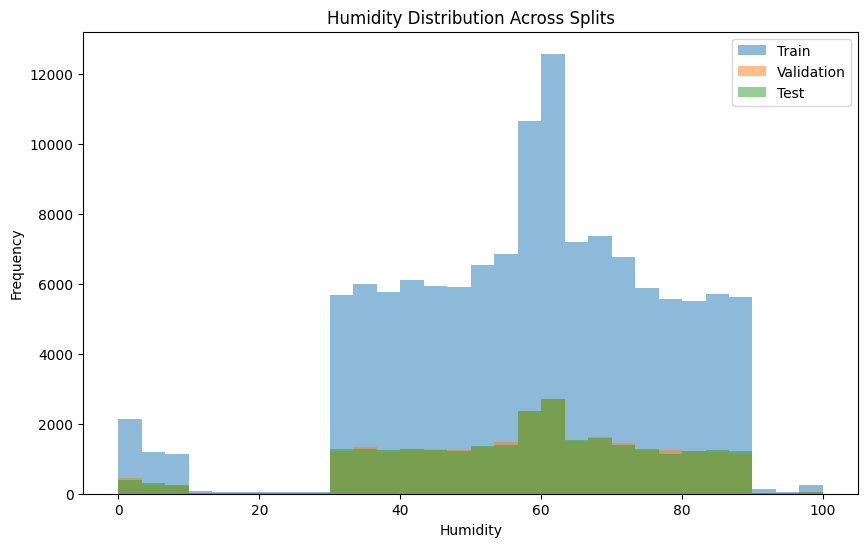

In [ ]:
#Visualize data distribution of 'humidity' column
plt.figure(figsize=(10, 6))
plt.hist(train_df['humidity'], bins=30, alpha=0.5, label='Train')
plt.hist(val_df['humidity'], bins=30, alpha=0.5, label='Validation')
plt.hist(test_df['humidity'], bins=30, alpha=0.5, label='Test')
plt.legend()
plt.title('Humidity Distribution Across Splits')
plt.xlabel('Humidity')
plt.ylabel('Frequency')
plt.show()

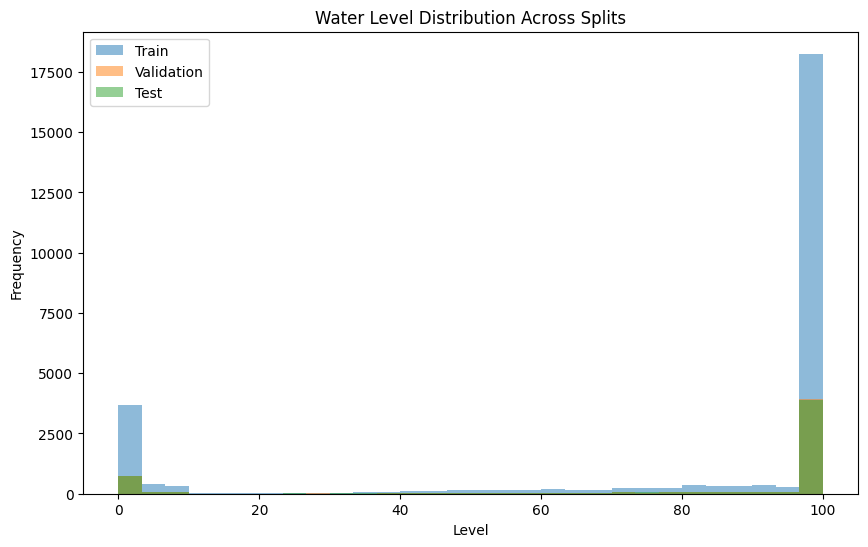

In [ ]:
#Visualize data distribution of 'water_level' column
plt.figure(figsize=(10, 6))
plt.hist(train_df['water_level'], bins=30, alpha=0.5, label='Train')
plt.hist(val_df['water_level'], bins=30, alpha=0.5, label='Validation')
plt.hist(test_df['water_level'], bins=30, alpha=0.5, label='Test')
plt.legend()
plt.title('Water Level Distribution Across Splits')
plt.xlabel('Level')
plt.ylabel('Frequency')
plt.show()

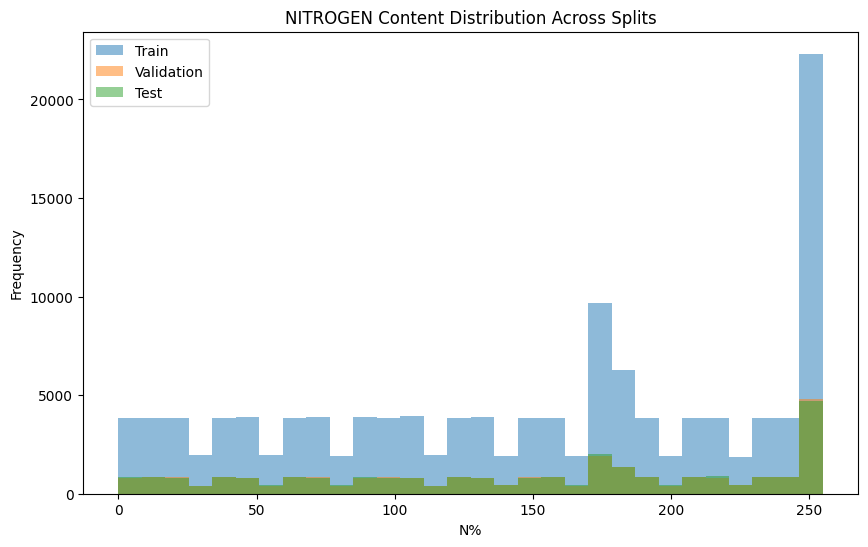

In [ ]:
#Visualize data distribution of 'N' column
plt.figure(figsize=(10, 6))
plt.hist(train_df['N'], bins=30, alpha=0.5, label='Train')
plt.hist(val_df['N'], bins=30, alpha=0.5, label='Validation')
plt.hist(test_df['N'], bins=30, alpha=0.5, label='Test')
plt.legend()
plt.title('NITROGEN Content Distribution Across Splits')
plt.xlabel('N%')
plt.ylabel('Frequency')
plt.show()

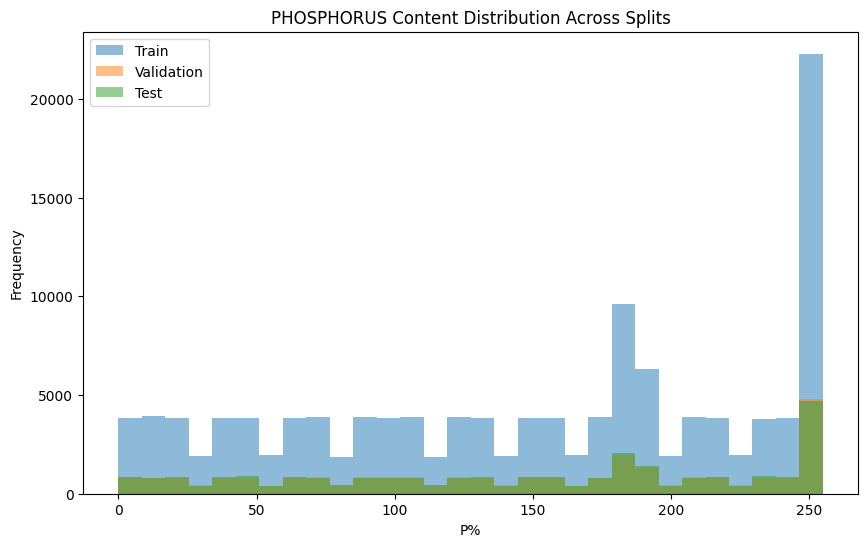

In [ ]:
#Visualize data distribution of 'P' column
plt.figure(figsize=(10, 6))
plt.hist(train_df['P'], bins=30, alpha=0.5, label='Train')
plt.hist(val_df['P'], bins=30, alpha=0.5, label='Validation')
plt.hist(test_df['P'], bins=30, alpha=0.5, label='Test')
plt.legend()
plt.title('PHOSPHORUS Content Distribution Across Splits')
plt.xlabel('P%')
plt.ylabel('Frequency')
plt.show()

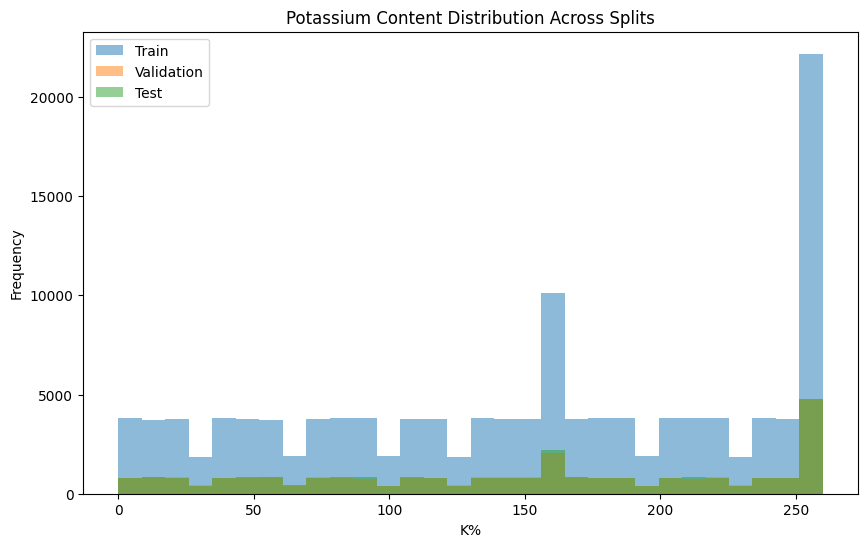

In [ ]:
#Visualize data distribution of 'K' column
plt.figure(figsize=(10, 6))
plt.hist(train_df['K'], bins=30, alpha=0.5, label='Train')
plt.hist(val_df['K'], bins=30, alpha=0.5, label='Validation')
plt.hist(test_df['K'], bins=30, alpha=0.5, label='Test')
plt.legend()
plt.title('Potassium Content Distribution Across Splits')
plt.xlabel('K%')
plt.ylabel('Frequency')
plt.show()

Machine Learning models training to predict if the crop needs water or not

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, classification_report, confusion_matrix, RocCurveDisplay
from sklearn.impute import SimpleImputer
from sklearn.model_selection import StratifiedKFold

#Example labeling rule (can be customized based on domain knowledge)
combined_df['needs_water'] = ((combined_df['humidity'] < 40) | (combined_df['water_level'] < 30)).astype(int)
features = ['tempreature', 'humidity', 'water_level', 'N', 'P', 'K']
X = combined_df[features]
y = combined_df['needs_water']
# Check for NaNs in the selected features before imputation
print("NaN count in features before imputation:")
print(X.isnull().sum())

# Impute missing values in the feature columns
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
X_imputed = imputer.fit_transform(X)

# Convert the imputed array back to a DataFrame (optional but can be helpful for inspection)
X_imputed_df = pd.DataFrame(X_imputed, columns=features)

# Check for NaNs after imputation
print("\nNaN count in features after imputation:")
print(X_imputed_df.isnull().sum())
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed_df)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


NaN count in features before imputation:
tempreature         0
humidity            0
water_level    143312
N                   0
P                   0
K                   0
dtype: int64

NaN count in features after imputation:
tempreature    0
humidity       0
water_level    0
N              0
P              0
K              0
dtype: int64


🔹 KNN Accuracy: 0.9858746930780479
[[28556   268]
 [  244  7179]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     28824
           1       0.96      0.97      0.97      7423

    accuracy                           0.99     36247
   macro avg       0.98      0.98      0.98     36247
weighted avg       0.99      0.99      0.99     36247

🔁 Cross-Validation Accuracy: 0.9855 ± 0.0004


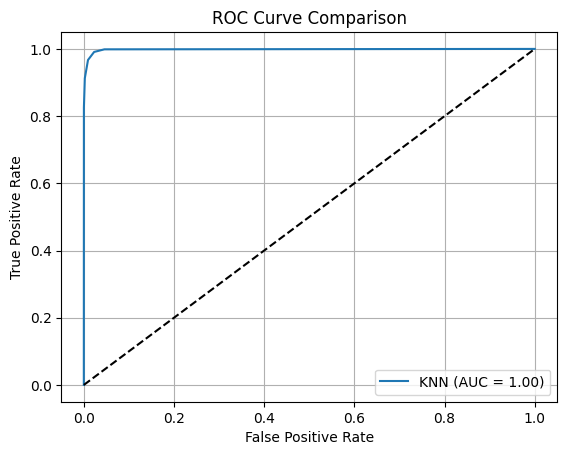

In [ ]:
def plot_roc(model, X_test, y_test, label):
    # Calculate predicted probabilities for the positive class
    y_probs = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_probs)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{label} (AUC = {roc_auc:.2f})')
    return roc_auc

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import roc_curve, auc

model_knn = KNeighborsClassifier(n_neighbors=5)
model_knn.fit(X_train, y_train)
y_pred_knn = model_knn.predict(X_test)

print("🔹 KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))
cv_acc = cross_val_score(model_knn, X_scaled, y, cv=skf, scoring='accuracy')
print(f"🔁 Cross-Validation Accuracy: {cv_acc.mean():.4f} ± {cv_acc.std():.4f}")

auc_score = plot_roc(model_knn, X_test, y_test, 'KNN')
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve Comparison')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid()
plt.show()

🔹 SVM Accuracy: 0.9988412834165586
[[28802    22]
 [   20  7403]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28824
           1       1.00      1.00      1.00      7423

    accuracy                           1.00     36247
   macro avg       1.00      1.00      1.00     36247
weighted avg       1.00      1.00      1.00     36247

🔁 Cross-Validation Accuracy: 0.9986 ± 0.0002


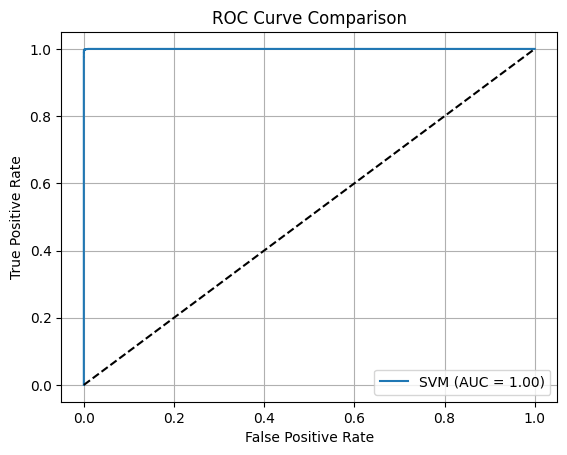

In [ ]:
def plot_roc(model, X_test, y_test, label):
    y_probs = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_probs)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{label} (AUC = {roc_auc:.2f})')
    return roc_auc
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import roc_curve, auc
model_svm = SVC(kernel='rbf', probability=True)
model_svm.fit(X_train, y_train)
y_pred_svm = model_svm.predict(X_test)

print("🔹 SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print(confusion_matrix(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))
cv_acc = cross_val_score(model_svm, X_scaled, y, cv=skf, scoring='accuracy')
print(f"🔁 Cross-Validation Accuracy: {cv_acc.mean():.4f} ± {cv_acc.std():.4f}")
auc_score_svm = plot_roc(model_svm, X_test, y_test, 'SVM')
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve Comparison')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid()
plt.show()

🔹 Logistic Regression Accuracy: 0.9919717493861561
[[28666   158]
 [  133  7290]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     28824
           1       0.98      0.98      0.98      7423

    accuracy                           0.99     36247
   macro avg       0.99      0.99      0.99     36247
weighted avg       0.99      0.99      0.99     36247

🔁 Cross-Validation Accuracy: 0.9915 ± 0.0004


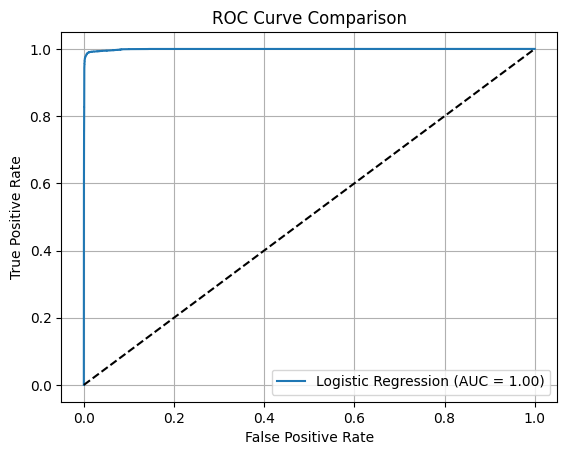

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

def plot_roc(model, X_test, y_test, label):
    y_probs = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_probs)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{label} (AUC = {roc_auc:.2f})')
    return roc_auc


model_logreg = LogisticRegression(max_iter=1000, solver='liblinear')
model_logreg.fit(X_train, y_train)

y_pred_logreg = model_logreg.predict(X_test)

print("🔹 Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_logreg))
print(confusion_matrix(y_test, y_pred_logreg))
print(classification_report(y_test, y_pred_logreg))

cv_acc = cross_val_score(model_logreg, X_scaled, y, cv=skf, scoring='accuracy')
print(f"🔁 Cross-Validation Accuracy: {cv_acc.mean():.4f} ± {cv_acc.std():.4f}")

auc_score_logreg = plot_roc(model_logreg, X_test, y_test, 'Logistic Regression')
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve Comparison')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid()
plt.show()


OVERFIT!!!!!!

🔹 Random Forest Accuracy: 1.0
[[28824     0]
 [    0  7423]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28824
           1       1.00      1.00      1.00      7423

    accuracy                           1.00     36247
   macro avg       1.00      1.00      1.00     36247
weighted avg       1.00      1.00      1.00     36247

🔁 Cross-Validation Accuracy: 1.0000 ± 0.0000


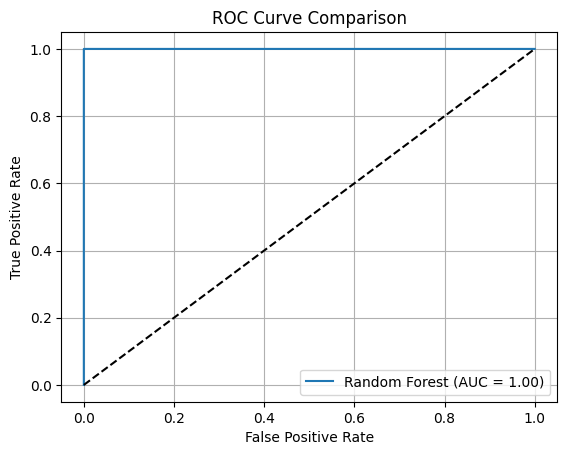

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

def plot_roc(model, X_test, y_test, label):
    y_probs = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_probs)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{label} (AUC = {roc_auc:.2f})')
    return roc_auc

model_rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42
)
model_rf.fit(X_train, y_train)

y_pred_rf = model_rf.predict(X_test)

print("🔹 Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

cv_acc = cross_val_score(model_rf, X_scaled, y, cv=skf, scoring='accuracy')
print(f"🔁 Cross-Validation Accuracy: {cv_acc.mean():.4f} ± {cv_acc.std():.4f}")

auc_score_rf = plot_roc(model_rf, X_test, y_test, 'Random Forest')
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve Comparison')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid()
plt.show()

🔹 Extra Trees Accuracy: 0.8413661820288576
[[28756     0]
 [ 5750  1741]]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91     28756
           1       1.00      0.23      0.38      7491

    accuracy                           0.84     36247
   macro avg       0.92      0.62      0.64     36247
weighted avg       0.87      0.84      0.80     36247



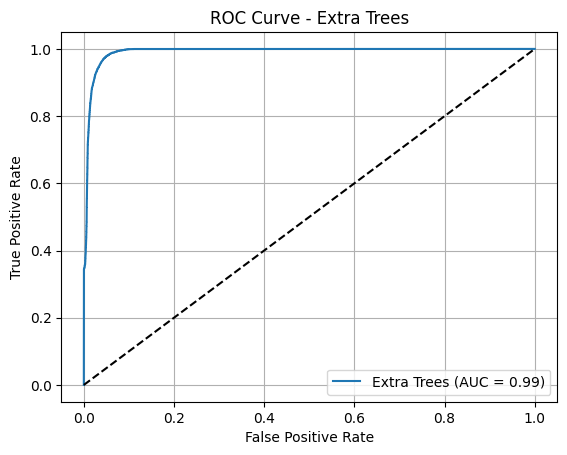

🔁 Cross-Validation Accuracy: 0.8431 ± 0.0033


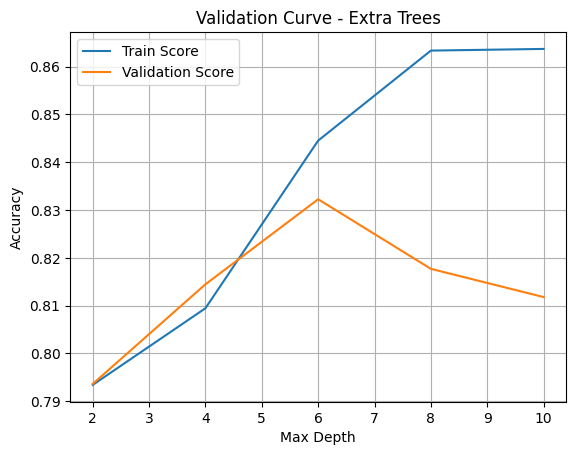

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, validation_curve
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# 📌 Assuming you already have:
# X_scaled = features (scaled)
# y = target

# ✅ Step 1: Reduce dimensionality with PCA
pca = PCA(n_components=0.95)  # Keep 95% variance
X_pca = pca.fit_transform(X_scaled)

# ✅ Step 2: Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, stratify=y, random_state=42)

# ✅ Step 3: Define ExtraTrees model
model_et = ExtraTreesClassifier(
    n_estimators=100,
    max_depth=6,
    min_samples_leaf=10,
    max_features=0.3,
    random_state=42
)

# ✅ Step 4: Fit the model
model_et.fit(X_train, y_train)

# ✅ Step 5: Make predictions
y_pred_et = model_et.predict(X_test)

# ✅ Step 6: Evaluate the model
print("🔹 Extra Trees Accuracy:", accuracy_score(y_test, y_pred_et))
print(confusion_matrix(y_test, y_pred_et))
print(classification_report(y_test, y_pred_et))

# ✅ Step 7: ROC Curve
def plot_roc(model, X_test, y_test, label):
    y_probs = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_probs)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{label} (AUC = {roc_auc:.2f})')
    return roc_auc

auc_score_et = plot_roc(model_et, X_test, y_test, 'Extra Trees')
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve - Extra Trees')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid()
plt.show()

# ✅ Step 8: Cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_acc = cross_val_score(model_et, X_pca, y, cv=skf, scoring='accuracy')
print(f"🔁 Cross-Validation Accuracy: {cv_acc.mean():.4f} ± {cv_acc.std():.4f}")

# ✅ Step 9: Validation Curve for max_depth tuning
param_range = [2, 4, 6, 8, 10]
train_scores, val_scores = validation_curve(
    model_et, X_pca, y, param_name="max_depth", param_range=param_range,
    scoring="accuracy", cv=5
)

train_mean = train_scores.mean(axis=1)
val_mean = val_scores.mean(axis=1)

plt.plot(param_range, train_mean, label='Train Score')
plt.plot(param_range, val_mean, label='Validation Score')
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.title("Validation Curve - Extra Trees")
plt.legend()
plt.grid()
plt.show()


In [ ]:
pip install imbalanced-learn


🔹 Decision Tree Accuracy: 0.9730460451899468
[[28329   427]
 [  550  6941]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.98     28756
           1       0.94      0.93      0.93      7491

    accuracy                           0.97     36247
   macro avg       0.96      0.96      0.96     36247
weighted avg       0.97      0.97      0.97     36247

🔁 Cross-Validation Accuracy: 1.0000 ± 0.0000


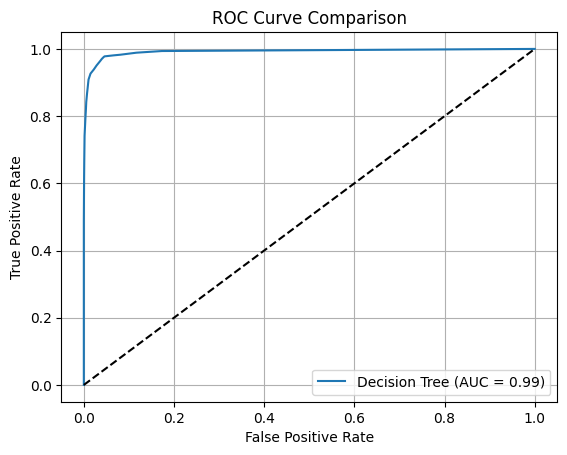

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

def plot_roc(model, X_test, y_test, label):
    y_probs = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_probs)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{label} (AUC = {roc_auc:.2f})')
    return roc_auc

model_dt = DecisionTreeClassifier(
    max_depth=5,
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42
)
model_dt.fit(X_train, y_train)

y_pred_dt = model_dt.predict(X_test)

print("🔹 Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print(confusion_matrix(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

cv_acc = cross_val_score(model_dt, X_scaled, y, cv=skf, scoring='accuracy')
print(f"🔁 Cross-Validation Accuracy: {cv_acc.mean():.4f} ± {cv_acc.std():.4f}")

auc_score_dt = plot_roc(model_dt, X_test, y_test, 'Decision Tree')
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve Comparison')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid()
plt.show()


Training of ML Models to predict if the fan actuator needs to be turned on or not

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, classification_report, confusion_matrix, RocCurveDisplay
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np

# Define labeling rule for fan actuator (can adjust according to domain)
combined_df['fan_needed'] = ((combined_df['tempreature'] > 30) | (combined_df['humidity'] > 70)).astype(int)

# Features and target
features = ['tempreature', 'humidity', 'water_level', 'N', 'P', 'K'] # Include all relevant features
X = combined_df[features]
y = combined_df['fan_needed']

# Check for missing values
print("NaN count in features before imputation:")
print(X.isnull().sum())

# Impute missing values
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
X_imputed = imputer.fit_transform(X)
X_imputed_df = pd.DataFrame(X_imputed, columns=features)

# Check after imputation
print("\nNaN count in features after imputation:")
print(X_imputed_df.isnull().sum())

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed_df)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

NaN count in features before imputation:
tempreature         0
humidity            0
water_level    143312
N                   0
P                   0
K                   0
dtype: int64

NaN count in features after imputation:
tempreature    0
humidity       0
water_level    0
N              0
P              0
K              0
dtype: int64


🔹 SVM Accuracy: 0.9907854443126328
[[19333   189]
 [  145 16580]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     19522
           1       0.99      0.99      0.99     16725

    accuracy                           0.99     36247
   macro avg       0.99      0.99      0.99     36247
weighted avg       0.99      0.99      0.99     36247

🔁 Cross-Validation Accuracy: 0.9898 ± 0.0005


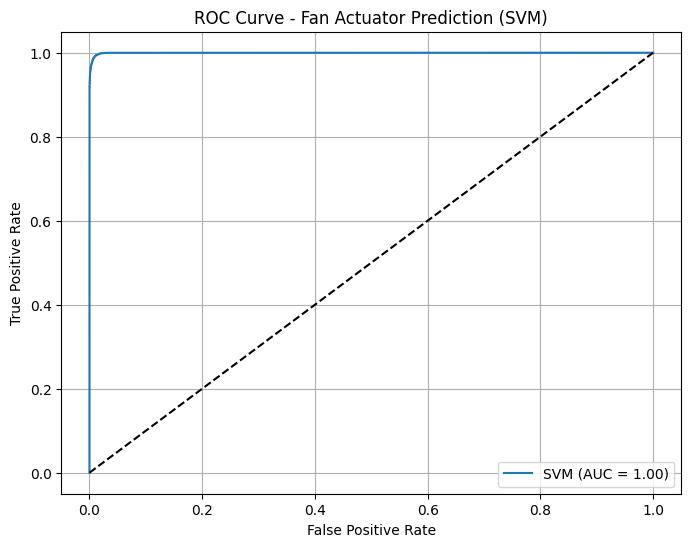

In [ ]:
# 🧠 Model Training – SVM
model_svm_fan = SVC(kernel='rbf', probability=True)
model_svm_fan.fit(X_train, y_train)
y_pred_svm_fan = model_svm_fan.predict(X_test)

# 🧾 Evaluation
print("🔹 SVM Accuracy:", accuracy_score(y_test, y_pred_svm_fan))
print(confusion_matrix(y_test, y_pred_svm_fan))
print(classification_report(y_test, y_pred_svm_fan))

cv_acc_svm_fan = cross_val_score(model_svm_fan, X_scaled, y, cv=skf, scoring='accuracy')
print(f"🔁 Cross-Validation Accuracy: {cv_acc_svm_fan.mean():.4f} ± {cv_acc_svm_fan.std():.4f}")

# 📊 ROC Curve
plt.figure(figsize=(8,6))
plot_roc(model_svm_fan, X_test, y_test, 'SVM')
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve - Fan Actuator Prediction (SVM)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid()
plt.show()

🔹 KNN Accuracy: 0.9784533892460066
[[19125   397]
 [  384 16341]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     19522
           1       0.98      0.98      0.98     16725

    accuracy                           0.98     36247
   macro avg       0.98      0.98      0.98     36247
weighted avg       0.98      0.98      0.98     36247

🔁 Cross-Validation Accuracy: 0.9776 ± 0.0004


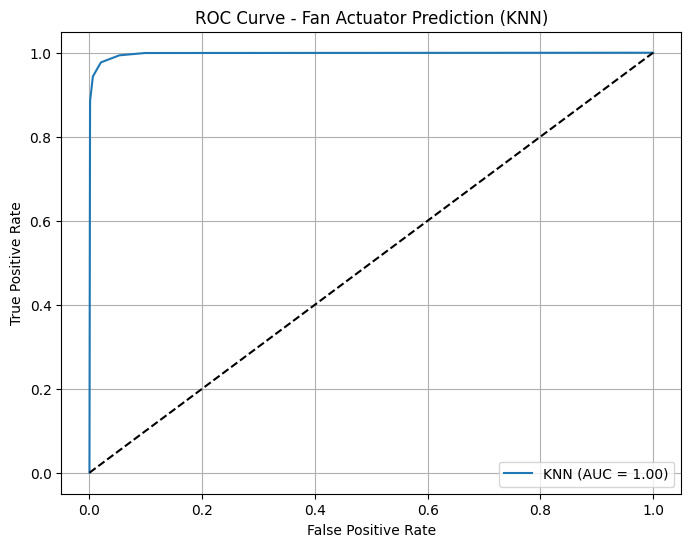

In [ ]:
# 🔁 Cross-validation setup
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 📈 ROC Plot Function
def plot_roc(model, X_test, y_test, label):
    y_probs = model.predict_proba(X_test)[:, 1]  # Get probabilities for positive class
    fpr, tpr, _ = roc_curve(y_test, y_probs)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{label} (AUC = {roc_auc:.2f})')
    return roc_auc

# 🧠 Model Training – KNN
model_knn = KNeighborsClassifier(n_neighbors=5)
model_knn.fit(X_train, y_train)
y_pred_knn = model_knn.predict(X_test)

# 🧾 Evaluation
print("🔹 KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

cv_acc = cross_val_score(model_knn, X_scaled, y, cv=skf, scoring='accuracy')
print(f"🔁 Cross-Validation Accuracy: {cv_acc.mean():.4f} ± {cv_acc.std():.4f}")

# 📊 ROC Curve
plt.figure(figsize=(8,6))
plot_roc(model_knn, X_test, y_test, 'KNN')
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve - Fan Actuator Prediction (KNN)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid()
plt.show()

🔹 Logistic Regression Accuracy: 0.8579192760780202
[[16722  2800]
 [ 2350 14375]]
              precision    recall  f1-score   support

           0       0.88      0.86      0.87     19522
           1       0.84      0.86      0.85     16725

    accuracy                           0.86     36247
   macro avg       0.86      0.86      0.86     36247
weighted avg       0.86      0.86      0.86     36247

🔁 Cross-Validation Accuracy: 0.8560 ± 0.0009


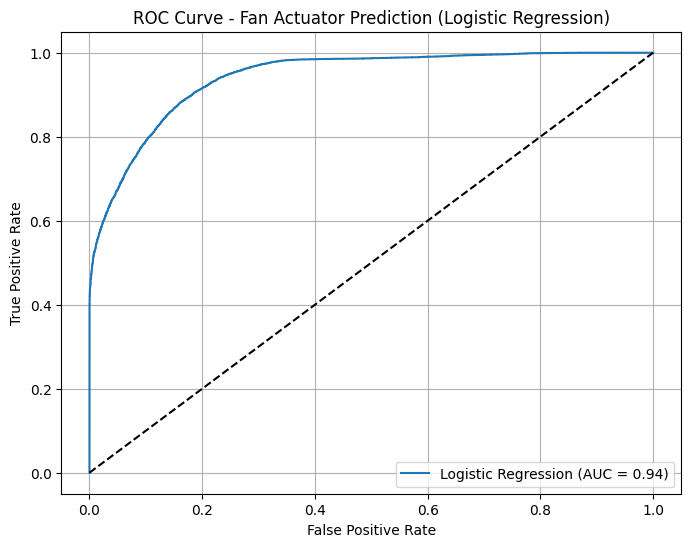

In [ ]:
# 🧠 Model Training – Logistic Regression
model_logreg_fan = LogisticRegression(max_iter=1000, solver='liblinear')
model_logreg_fan.fit(X_train, y_train)
y_pred_logreg_fan = model_logreg_fan.predict(X_test)

# 🧾 Evaluation
print("🔹 Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_logreg_fan))
print(confusion_matrix(y_test, y_pred_logreg_fan))
print(classification_report(y_test, y_pred_logreg_fan))

cv_acc_logreg_fan = cross_val_score(model_logreg_fan, X_scaled, y, cv=skf, scoring='accuracy')
print(f"🔁 Cross-Validation Accuracy: {cv_acc_logreg_fan.mean():.4f} ± {cv_acc_logreg_fan.std():.4f}")

# 📊 ROC Curve
plt.figure(figsize=(8,6))
plot_roc(model_logreg_fan, X_test, y_test, 'Logistic Regression')
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve - Fan Actuator Prediction (Logistic Regression)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid()
plt.show()

🔹 Decision Tree Accuracy: 0.9999724115099181
[[19522     0]
 [    1 16724]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19522
           1       1.00      1.00      1.00     16725

    accuracy                           1.00     36247
   macro avg       1.00      1.00      1.00     36247
weighted avg       1.00      1.00      1.00     36247

🔁 Cross-Validation Accuracy: 1.0000 ± 0.0000


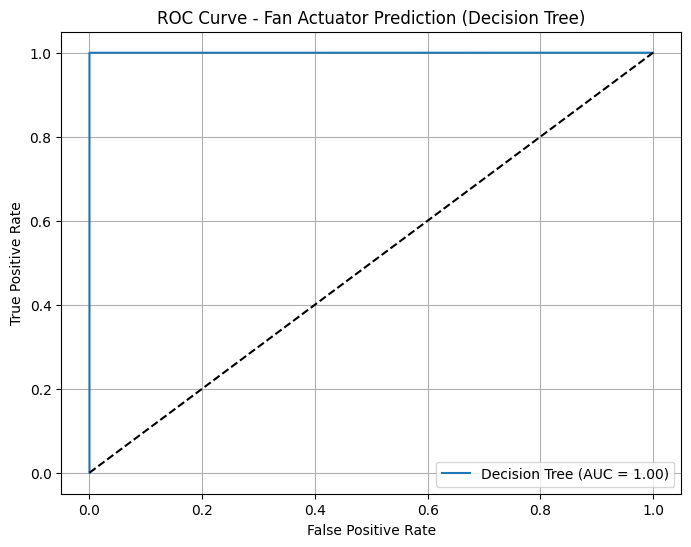

In [ ]:
# 🧠 Model Training – Decision Tree
model_dt_fan = DecisionTreeClassifier(
    max_depth=5,
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42
)
model_dt_fan.fit(X_train, y_train)
y_pred_dt_fan = model_dt_fan.predict(X_test)

# 🧾 Evaluation
print("🔹 Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt_fan))
print(confusion_matrix(y_test, y_pred_dt_fan))
print(classification_report(y_test, y_pred_dt_fan))

cv_acc_dt_fan = cross_val_score(model_dt_fan, X_scaled, y, cv=skf, scoring='accuracy')
print(f"🔁 Cross-Validation Accuracy: {cv_acc_dt_fan.mean():.4f} ± {cv_acc_dt_fan.std():.4f}")

# 📊 ROC Curve
plt.figure(figsize=(8,6))
plot_roc(model_dt_fan, X_test, y_test, 'Decision Tree')
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve - Fan Actuator Prediction (Decision Tree)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid()
plt.show()

🔹 Random Forest Accuracy: 0.9999724115099181
[[19522     0]
 [    1 16724]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19522
           1       1.00      1.00      1.00     16725

    accuracy                           1.00     36247
   macro avg       1.00      1.00      1.00     36247
weighted avg       1.00      1.00      1.00     36247

🔁 Cross-Validation Accuracy: 1.0000 ± 0.0000


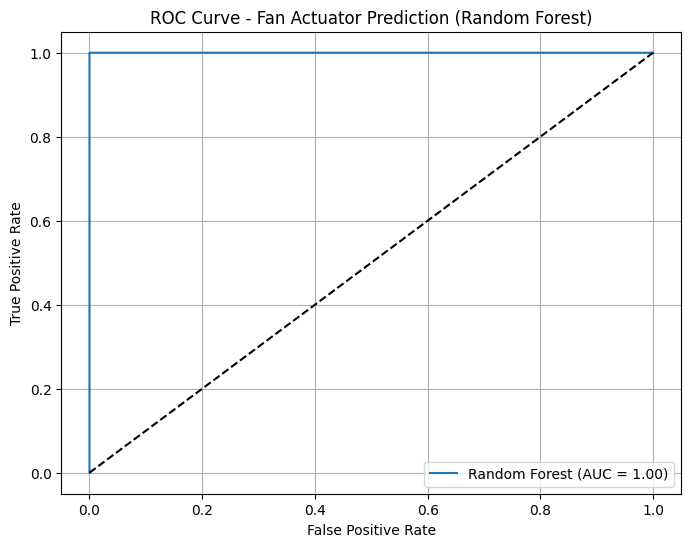

In [ ]:
# 🧠 Model Training – Random Forest
model_rf_fan = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42
)
model_rf_fan.fit(X_train, y_train)
y_pred_rf_fan = model_rf_fan.predict(X_test)

# 🧾 Evaluation
print("🔹 Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf_fan))
print(confusion_matrix(y_test, y_pred_rf_fan))
print(classification_report(y_test, y_pred_rf_fan))

cv_acc_rf_fan = cross_val_score(model_rf_fan, X_scaled, y, cv=skf, scoring='accuracy')
print(f"🔁 Cross-Validation Accuracy: {cv_acc_rf_fan.mean():.4f} ± {cv_acc_rf_fan.std():.4f}")

# 📊 ROC Curve
plt.figure(figsize=(8,6))
plot_roc(model_rf_fan, X_test, y_test, 'Random Forest')
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve - Fan Actuator Prediction (Random Forest)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid()
plt.show()

Training ML models to predict quality of soil

NaN count in features before imputation (Soil Quality):
water_level    143312
N                   0
P                   0
K                   0
dtype: int64

NaN count in features after imputation (Soil Quality):
water_level    0
N              0
P              0
K              0
dtype: int64

🔹 KNN Accuracy (Soil Quality): 0.9999448230198361
[[  298     0]
 [    2 35947]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       298
           1       1.00      1.00      1.00     35949

    accuracy                           1.00     36247
   macro avg       1.00      1.00      1.00     36247
weighted avg       1.00      1.00      1.00     36247

🔁 Cross-Validation Accuracy (KNN, Soil Quality): 0.9999 ± 0.0001


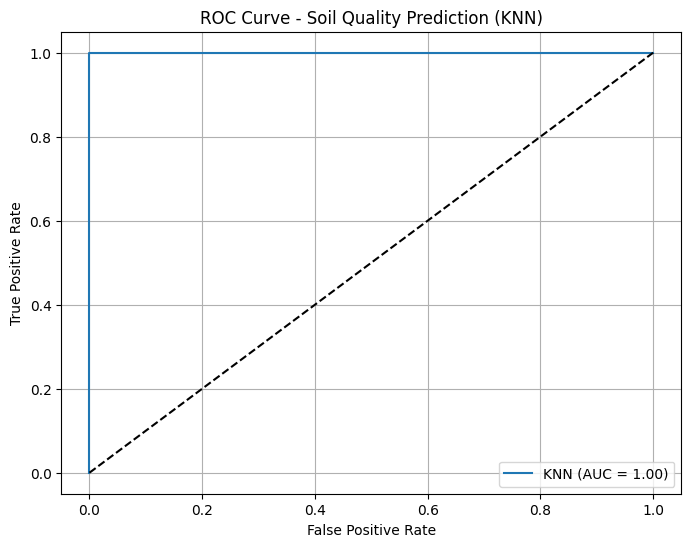


🔹 SVM Accuracy (Soil Quality): 0.9974618589124618
[[  298     0]
 [   92 35857]]
              precision    recall  f1-score   support

           0       0.76      1.00      0.87       298
           1       1.00      1.00      1.00     35949

    accuracy                           1.00     36247
   macro avg       0.88      1.00      0.93     36247
weighted avg       1.00      1.00      1.00     36247

🔁 Cross-Validation Accuracy (SVM, Soil Quality): 0.9977 ± 0.0001


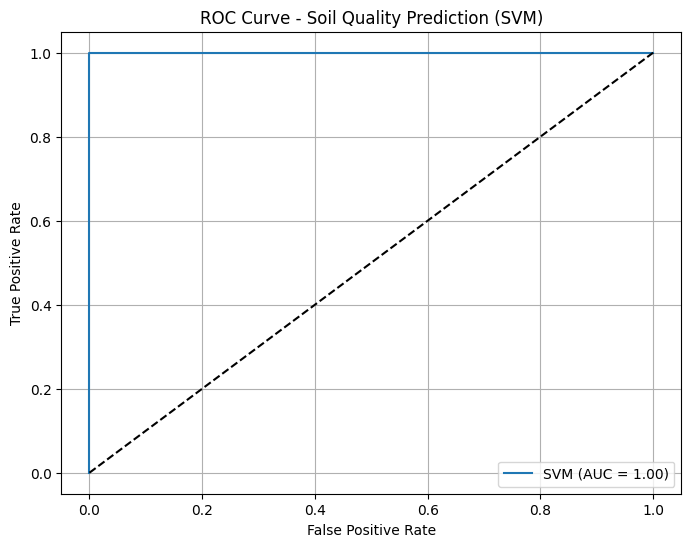


🔹 Logistic Regression Accuracy (Soil Quality): 0.960934698043976
[[  298     0]
 [ 1416 34533]]
              precision    recall  f1-score   support

           0       0.17      1.00      0.30       298
           1       1.00      0.96      0.98     35949

    accuracy                           0.96     36247
   macro avg       0.59      0.98      0.64     36247
weighted avg       0.99      0.96      0.97     36247

🔁 Cross-Validation Accuracy (Logistic Regression, Soil Quality): 0.9616 ± 0.0008


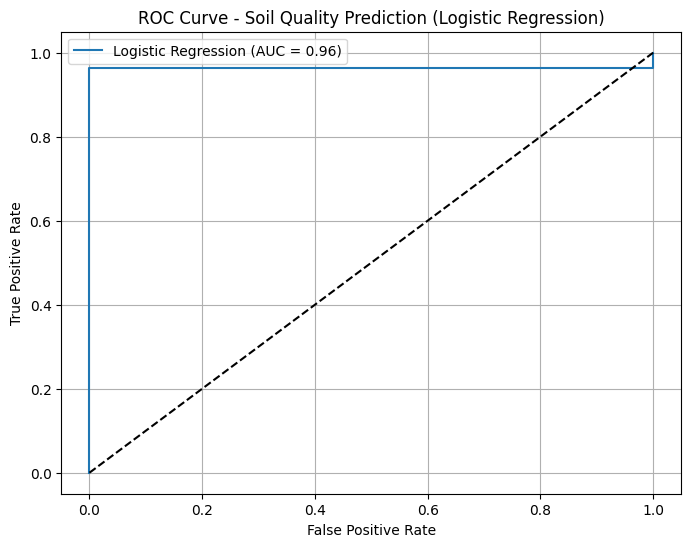


🔹 Decision Tree Accuracy (Soil Quality): 1.0
[[  298     0]
 [    0 35949]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       298
           1       1.00      1.00      1.00     35949

    accuracy                           1.00     36247
   macro avg       1.00      1.00      1.00     36247
weighted avg       1.00      1.00      1.00     36247

🔁 Cross-Validation Accuracy (Decision Tree, Soil Quality): 1.0000 ± 0.0000


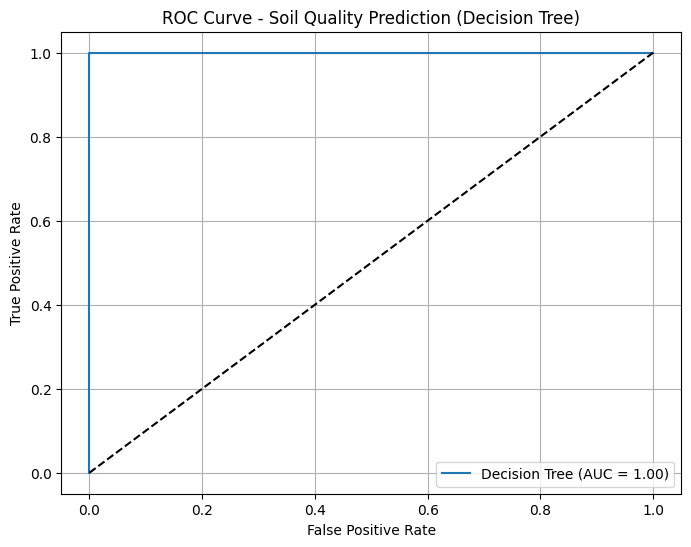


🔹 Random Forest Accuracy (Soil Quality): 1.0
[[  298     0]
 [    0 35949]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       298
           1       1.00      1.00      1.00     35949

    accuracy                           1.00     36247
   macro avg       1.00      1.00      1.00     36247
weighted avg       1.00      1.00      1.00     36247

🔁 Cross-Validation Accuracy (Random Forest, Soil Quality): 1.0000 ± 0.0000


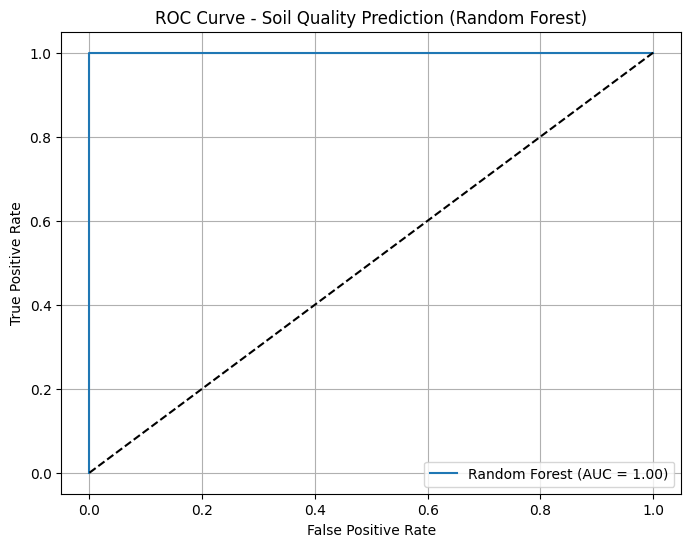

In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, classification_report, confusion_matrix, RocCurveDisplay
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Label soil quality (based on moisture levels, adjust rules as needed)
# Assuming 'water_level' represents soil moisture
combined_df['soil_quality'] = combined_df['water_level'].apply(lambda m: 'Good' if 30 <= m <= 60 else 'Poor')

# Features and target
features_soil = ['water_level', 'N', 'P', 'K']
X_soil = combined_df[features_soil]
y_soil = combined_df['soil_quality']

# Encode the target labels
le_soil = LabelEncoder()
y_soil_encoded = le_soil.fit_transform(y_soil)

# Check for missing values
print("NaN count in features before imputation (Soil Quality):")
print(X_soil.isnull().sum())

# Impute missing values
imputer_soil = SimpleImputer(missing_values=np.nan, strategy='mean')
X_soil_imputed = imputer_soil.fit_transform(X_soil)
X_soil_imputed_df = pd.DataFrame(X_soil_imputed, columns=features_soil)

# Check after imputation
print("\nNaN count in features after imputation (Soil Quality):")
print(X_soil_imputed_df.isnull().sum())

# Standardize the features
scaler_soil = StandardScaler()
X_soil_scaled = scaler_soil.fit_transform(X_soil_imputed_df)

# Train-test split (using stratify to maintain class proportions)
X_train_soil, X_test_soil, y_train_soil, y_test_soil = train_test_split(X_soil_scaled, y_soil_encoded, test_size=0.2, random_state=42, stratify=y_soil_encoded)

# 🔁 Cross-validation setup
skf_soil = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 📈 ROC Plot Function (for binary classification)
def plot_roc_binary(model, X_test, y_test, label):
    # Check if the model has predict_proba (some SVM kernels don't by default)
    if hasattr(model, "predict_proba"):
        y_probs = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_probs)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{label} (AUC = {roc_auc:.2f})')
        return roc_auc
    else:
        print(f"Model {label} does not support predict_proba for ROC curve.")
        return None

# 🧠 Model Training – KNN
# KNN is less prone to overfitting from the data itself but can overfit with too many neighbors
model_knn_soil = KNeighborsClassifier(n_neighbors=20) # Increased neighbors
model_knn_soil.fit(X_train_soil, y_train_soil)
y_pred_knn_soil = model_knn_soil.predict(X_test_soil)

# 🧾 Evaluation
print("\n🔹 KNN Accuracy (Soil Quality):", accuracy_score(y_test_soil, y_pred_knn_soil))
print(confusion_matrix(y_test_soil, y_pred_knn_soil))
# Use zero_division=0 to handle cases where a class has no predicted samples
print(classification_report(y_test_soil, y_pred_knn_soil, zero_division=0))

cv_acc_knn_soil = cross_val_score(model_knn_soil, X_soil_scaled, y_soil_encoded, cv=skf_soil, scoring='accuracy')
print(f"🔁 Cross-Validation Accuracy (KNN, Soil Quality): {cv_acc_knn_soil.mean():.4f} ± {cv_acc_knn_soil.std():.4f}")

# 📊 ROC Curve
plt.figure(figsize=(8,6))
plot_roc_binary(model_knn_soil, X_test_soil, y_test_soil, 'KNN')
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve - Soil Quality Prediction (KNN)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid()
plt.show()

# 🧠 Model Training – SVM
# Added regularization (C) and class_weight
model_svm_soil = SVC(kernel='rbf', probability=True, C=0.1, class_weight='balanced', random_state=42)
model_svm_soil.fit(X_train_soil, y_train_soil)
y_pred_svm_soil = model_svm_soil.predict(X_test_soil)

# 🧾 Evaluation
print("\n🔹 SVM Accuracy (Soil Quality):", accuracy_score(y_test_soil, y_pred_svm_soil))
print(confusion_matrix(y_test_soil, y_pred_svm_soil))
print(classification_report(y_test_soil, y_pred_svm_soil, zero_division=0))

cv_acc_svm_soil = cross_val_score(model_svm_soil, X_soil_scaled, y_soil_encoded, cv=skf_soil, scoring='accuracy')
print(f"🔁 Cross-Validation Accuracy (SVM, Soil Quality): {cv_acc_svm_soil.mean():.4f} ± {cv_acc_svm_soil.std():.4f}")

# 📊 ROC Curve
plt.figure(figsize=(8,6))
plot_roc_binary(model_svm_soil, X_test_soil, y_test_soil, 'SVM')
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve - Soil Quality Prediction (SVM)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid()
plt.show()

# 🧠 Model Training – Logistic Regression
# Added regularization (C) and class_weight
model_logreg_soil = LogisticRegression(max_iter=1000, solver='liblinear', C=0.1, class_weight='balanced', random_state=42)
model_logreg_soil.fit(X_train_soil, y_train_soil)
y_pred_logreg_soil = model_logreg_soil.predict(X_test_soil)

# 🧾 Evaluation
print("\n🔹 Logistic Regression Accuracy (Soil Quality):", accuracy_score(y_test_soil, y_pred_logreg_soil))
print(confusion_matrix(y_test_soil, y_pred_logreg_soil))
print(classification_report(y_test_soil, y_pred_logreg_soil, zero_division=0))

cv_acc_logreg_soil = cross_val_score(model_logreg_soil, X_soil_scaled, y_soil_encoded, cv=skf_soil, scoring='accuracy')
print(f"🔁 Cross-Validation Accuracy (Logistic Regression, Soil Quality): {cv_acc_logreg_soil.mean():.4f} ± {cv_acc_logreg_soil.std():.4f}")

# 📊 ROC Curve
plt.figure(figsize=(8,6))
plot_roc_binary(model_logreg_soil, X_test_soil, y_test_soil, 'Logistic Regression')
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve - Soil Quality Prediction (Logistic Regression)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid()
plt.show()

# 🧠 Model Training – Decision Tree
# Limited max_depth and increased min_samples_leaf
model_dt_soil = DecisionTreeClassifier(
    max_depth=3, # Reduced depth
    min_samples_split=20, # Increased min samples to split
    min_samples_leaf=10, # Increased min samples per leaf
    random_state=42
)
model_dt_soil.fit(X_train_soil, y_train_soil)
y_pred_dt_soil = model_dt_soil.predict(X_test_soil)

# 🧾 Evaluation
print("\n🔹 Decision Tree Accuracy (Soil Quality):", accuracy_score(y_test_soil, y_pred_dt_soil))
print(confusion_matrix(y_test_soil, y_pred_dt_soil))
print(classification_report(y_test_soil, y_pred_dt_soil, zero_division=0))

cv_acc_dt_soil = cross_val_score(model_dt_soil, X_soil_scaled, y_soil_encoded, cv=skf_soil, scoring='accuracy')
print(f"🔁 Cross-Validation Accuracy (Decision Tree, Soil Quality): {cv_acc_dt_soil.mean():.4f} ± {cv_acc_dt_soil.std():.4f}")

# 📊 ROC Curve
plt.figure(figsize=(8,6))
plot_roc_binary(model_dt_soil, X_test_soil, y_test_soil, 'Decision Tree')
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve - Soil Quality Prediction (Decision Tree)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid()
plt.show()

# 🧠 Model Training – Random Forest
# Limited max_depth and increased min_samples_leaf
model_rf_soil = RandomForestClassifier(
    n_estimators=100,
    max_depth=5, # Reduced depth
    min_samples_split=20, # Increased min samples to split
    min_samples_leaf=10, # Increased min samples per leaf
    random_state=42,
    class_weight='balanced' # Added class_weight
)
model_rf_soil.fit(X_train_soil, y_train_soil)
y_pred_rf_soil = model_rf_soil.predict(X_test_soil)

# 🧾 Evaluation
print("\n🔹 Random Forest Accuracy (Soil Quality):", accuracy_score(y_test_soil, y_pred_rf_soil))
print(confusion_matrix(y_test_soil, y_pred_rf_soil))
print(classification_report(y_test_soil, y_pred_rf_soil, zero_division=0))

cv_acc_rf_soil = cross_val_score(model_rf_soil, X_soil_scaled, y_soil_encoded, cv=skf_soil, scoring='accuracy')
print(f"🔁 Cross-Validation Accuracy (Random Forest, Soil Quality): {cv_acc_rf_soil.mean():.4f} ± {cv_acc_rf_soil.std():.4f}")

# 📊 ROC Curve
plt.figure(figsize=(8,6))
plot_roc_binary(model_rf_soil, X_test_soil, y_test_soil, 'Random Forest')
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve - Soil Quality Prediction (Random Forest)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid()
plt.show()

Training ML model for crop recommendation

In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd
import numpy as np

# Define the crop recommendation based on the available features
# Assuming 'crop_type' column exists in combined_df for this task
features_crop = ['tempreature', 'humidity', 'water_level', 'N', 'P', 'K']
X_crop = combined_df[features_crop]

# Check if 'crop_type' column exists. If not, create a dummy one for demonstration.
if 'crop_type' not in combined_df.columns:
    print("Warning: 'crop_type' column not found. Creating dummy crop types for demonstration.")
    # Create dummy crop types based on some simple rules for demonstration
    def assign_dummy_crop(row):
        if row['N'] > 200 and row['P'] > 200:
            return 'Crop_A'
        elif row['humidity'] > 70 and row['water_level'] > 80:
            return 'Crop_B'
        else:
            return 'Crop_C'
    combined_df['crop_type'] = combined_df.apply(assign_dummy_crop, axis=1)


y_crop = combined_df['crop_type']  # Assuming crop type exists

# Encode the target labels for classification
le_crop = LabelEncoder()
y_crop_encoded = le_crop.fit_transform(y_crop)

# Check for missing values
print("NaN count in features before imputation (Crop Recommendation):")
print(X_crop.isnull().sum())

# Impute missing values
imputer_crop = SimpleImputer(missing_values=np.nan, strategy='mean')
X_crop_imputed = imputer_crop.fit_transform(X_crop)
X_crop_imputed_df = pd.DataFrame(X_crop_imputed, columns=features_crop)

# Check after imputation
print("\nNaN count in features after imputation (Crop Recommendation):")
print(X_crop_imputed_df.isnull().sum())

# Standardize the features
scaler_crop = StandardScaler()
X_crop_scaled = scaler_crop.fit_transform(X_crop_imputed_df)

# Train-test split
X_train_crop, X_test_crop, y_train_crop, y_test_crop = train_test_split(X_crop_scaled, y_crop_encoded, test_size=0.2, random_state=42, stratify=y_crop_encoded)

# 🔁 Cross-validation setup (for multi-class classification)
# Using StratifiedKFold with the encoded labels
skf_crop = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


# 🧠 Model Training – KNN (Crop Recommendation)
model_knn_crop = KNeighborsClassifier(n_neighbors=5)
model_knn_crop.fit(X_train_crop, y_train_crop)
y_pred_knn_crop = model_knn_crop.predict(X_test_crop)

# 🧾 Evaluation
print("\n🔹 KNN Accuracy (Crop Recommendation):", accuracy_score(y_test_crop, y_pred_knn_crop))
print(classification_report(y_test_crop, y_pred_knn_crop, target_names=le_crop.classes_))

cv_acc_knn_crop = cross_val_score(model_knn_crop, X_crop_scaled, y_crop_encoded, cv=skf_crop, scoring='accuracy')
print(f"🔁 Cross-Validation Accuracy (KNN, Crop Recommendation): {cv_acc_knn_crop.mean():.4f} ± {cv_acc_knn_crop.std():.4f}")


# 🧠 Model Training – SVM (Crop Recommendation)
# For multi-class, SVM does not have predict_proba by default, need to set probability=True
model_svm_crop = SVC(kernel='rbf', probability=True)
model_svm_crop.fit(X_train_crop, y_train_crop)
y_pred_svm_crop = model_svm_crop.predict(X_test_crop)

# 🧾 Evaluation
print("\n🔹 SVM Accuracy (Crop Recommendation):", accuracy_score(y_test_crop, y_pred_svm_crop))
print(classification_report(y_test_crop, y_pred_svm_crop, target_names=le_crop.classes_))

cv_acc_svm_crop = cross_val_score(model_svm_crop, X_crop_scaled, y_crop_encoded, cv=skf_crop, scoring='accuracy')
print(f"🔁 Cross-Validation Accuracy (SVM, Crop Recommendation): {cv_acc_svm_crop.mean():.4f} ± {cv_acc_svm_crop.std():.4f}")


# 🧠 Model Training – Logistic Regression (Crop Recommendation)
model_logreg_crop = LogisticRegression(max_iter=1000, solver='liblinear')
model_logreg_crop.fit(X_train_crop, y_train_crop)
y_pred_logreg_crop = model_logreg_crop.predict(X_test_crop)

# 🧾 Evaluation
print("\n🔹 Logistic Regression Accuracy (Crop Recommendation):", accuracy_score(y_test_crop, y_pred_logreg_crop))
print(classification_report(y_test_crop, y_pred_logreg_crop, target_names=le_crop.classes_))

cv_acc_logreg_crop = cross_val_score(model_logreg_crop, X_crop_scaled, y_crop_encoded, cv=skf_crop, scoring='accuracy')
print(f"🔁 Cross-Validation Accuracy (Logistic Regression, Crop Recommendation): {cv_acc_logreg_crop.mean():.4f} ± {cv_acc_logreg_crop.std():.4f}")


# 🧠 Model Training – Decision Tree (Crop Recommendation)
model_dt_crop = DecisionTreeClassifier(
    max_depth=5,
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42
)
model_dt_crop.fit(X_train_crop, y_train_crop)
y_pred_dt_crop = model_dt_crop.predict(X_test_crop)

# 🧾 Evaluation
print("\n🔹 Decision Tree Accuracy (Crop Recommendation):", accuracy_score(y_test_crop, y_pred_dt_crop))
print(classification_report(y_test_crop, y_pred_dt_crop, target_names=le_crop.classes_))

cv_acc_dt_crop = cross_val_score(model_dt_crop, X_crop_scaled, y_crop_encoded, cv=skf_crop, scoring='accuracy')
print(f"🔁 Cross-Validation Accuracy (Decision Tree, Crop Recommendation): {cv_acc_dt_crop.mean():.4f} ± {cv_acc_dt_crop.std():.4f}")


# 🧠 Model Training – Random Forest (Crop Recommendation)
model_rf_crop = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42
)
model_rf_crop.fit(X_train_crop, y_train_crop)
y_pred_rf_crop = model_rf_crop.predict(X_test_crop)

# 🧾 Evaluation
print("\n🔹 Random Forest Accuracy (Crop Recommendation):", accuracy_score(y_test_crop, y_pred_rf_crop))
print(classification_report(y_test_crop, y_pred_rf_crop, target_names=le_crop.classes_))

cv_acc_rf_crop = cross_val_score(model_rf_crop, X_crop_scaled, y_crop_encoded, cv=skf_crop, scoring='accuracy')
print(f"🔁 Cross-Validation Accuracy (Random Forest, Crop Recommendation): {cv_acc_rf_crop.mean():.4f} ± {cv_acc_rf_crop.std():.4f}")

NaN count in features before imputation (Crop Recommendation):
tempreature         0
humidity            0
water_level    143312
N                   0
P                   0
K                   0
dtype: int64

NaN count in features after imputation (Crop Recommendation):
tempreature    0
humidity       0
water_level    0
N              0
P              0
K              0
dtype: int64

🔹 KNN Accuracy (Crop Recommendation): 0.993378762380335
              precision    recall  f1-score   support

      Crop_A       0.99      0.98      0.98      6542
      Crop_B       0.99      0.96      0.98       331
      Crop_C       1.00      1.00      1.00     29374

    accuracy                           0.99     36247
   macro avg       0.99      0.98      0.98     36247
weighted avg       0.99      0.99      0.99     36247

🔁 Cross-Validation Accuracy (KNN, Crop Recommendation): 0.9937 ± 0.0002

🔹 SVM Accuracy (Crop Recommendation): 0.9926062846580407
              precision    recall  f1-score   

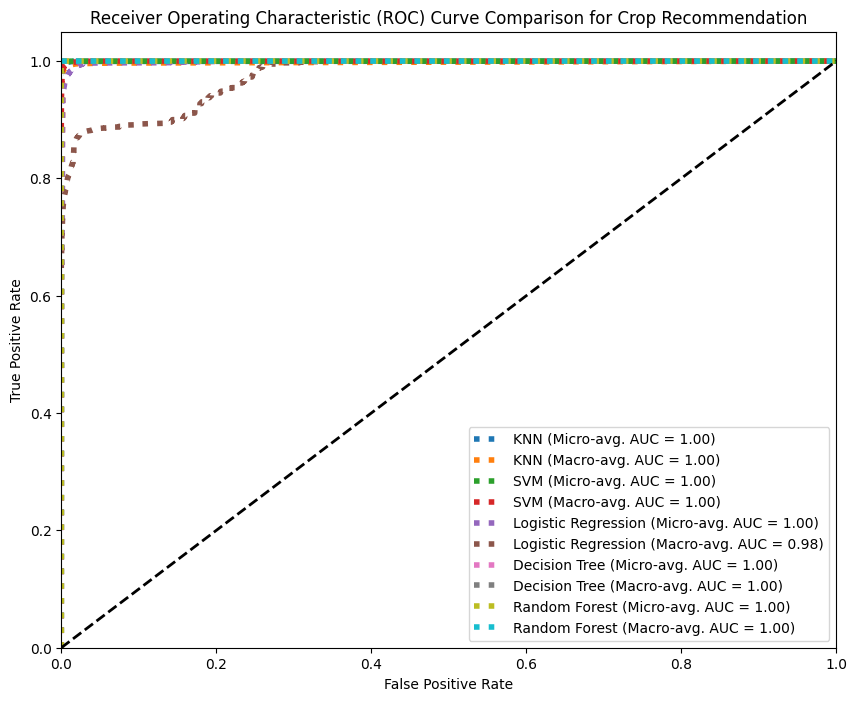

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

# Assuming y_test_crop contains the true integer labels and y_pred_proba_crop contains the predicted probabilities
# If y_pred_proba_crop is not available, you'll need to run predict_proba for each model on the test set

# Binarize the output for ROC
n_classes = len(le_crop.classes_)
y_test_bin = label_binarize(y_test_crop, classes=range(n_classes))

plt.figure(figsize=(10, 8))

# Function to plot ROC for a given model
def plot_roc_multiclass(model, X_test, y_test_bin, label, n_classes):
    if hasattr(model, "predict_proba"):
        y_score = model.predict_proba(X_test)

        # Compute ROC curve and ROC area for each class
        fpr = dict()
        tpr = dict()
        roc_auc = dict()
        for i in range(n_classes):
            fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])

        # Compute micro-average ROC curve and ROC area
        fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
        roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

        # Compute macro-average ROC curve and ROC area
        all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
        mean_tpr = np.zeros_like(all_fpr)
        for i in range(n_classes):
            mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
        mean_tpr /= n_classes
        fpr["macro"] = all_fpr
        tpr["macro"] = mean_tpr
        roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

        plt.plot(fpr["micro"], tpr["micro"],
                 label=f'{label} (Micro-avg. AUC = {roc_auc["micro"]:.2f})',
                 linestyle=':', linewidth=4)

        plt.plot(fpr["macro"], tpr["macro"],
                 label=f'{label} (Macro-avg. AUC = {roc_auc["macro"]:.2f})',
                 linestyle=':', linewidth=4)

    else:
        print(f"Model {label} does not support predict_proba.")


# Plot ROC for each model
plot_roc_multiclass(model_knn_crop, X_test_crop, y_test_bin, 'KNN', n_classes)
plot_roc_multiclass(model_svm_crop, X_test_crop, y_test_bin, 'SVM', n_classes)
plot_roc_multiclass(model_logreg_crop, X_test_crop, y_test_bin, 'Logistic Regression', n_classes)
plot_roc_multiclass(model_dt_crop, X_test_crop, y_test_bin, 'Decision Tree', n_classes)
plot_roc_multiclass(model_rf_crop, X_test_crop, y_test_bin, 'Random Forest', n_classes)


plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve Comparison for Crop Recommendation')
plt.legend(loc="lower right")
plt.show()

Training ML models to predict if temperature is optimal for cultivation or not

In [ ]:
# Label the temperature suitability for cultivation (adjust as per domain rules)
combined_df['temp_suitable'] = combined_df['tempreature'].apply(lambda t: 1 if 18 <= t <= 30 else 0)

# Features and target
features = ['tempreature', 'humidity']
X = combined_df[features]
y = combined_df['temp_suitable']

# Check for missing values
print("NaN count in features before imputation:")
print(X.isnull().sum())

# Impute missing values
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
X_imputed = imputer.fit_transform(X)
X_imputed_df = pd.DataFrame(X_imputed, columns=features)

# Check after imputation
print("\nNaN count in features after imputation:")
print(X_imputed_df.isnull().sum())

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed_df)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

NaN count in features before imputation:
tempreature    0
humidity       0
dtype: int64

NaN count in features after imputation:
tempreature    0
humidity       0
dtype: int64


🔹 KNN Accuracy: 0.9988964603967225
[[14189    26]
 [   14 22018]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14215
           1       1.00      1.00      1.00     22032

    accuracy                           1.00     36247
   macro avg       1.00      1.00      1.00     36247
weighted avg       1.00      1.00      1.00     36247

🔁 Cross-Validation Accuracy: 0.9988 ± 0.0002


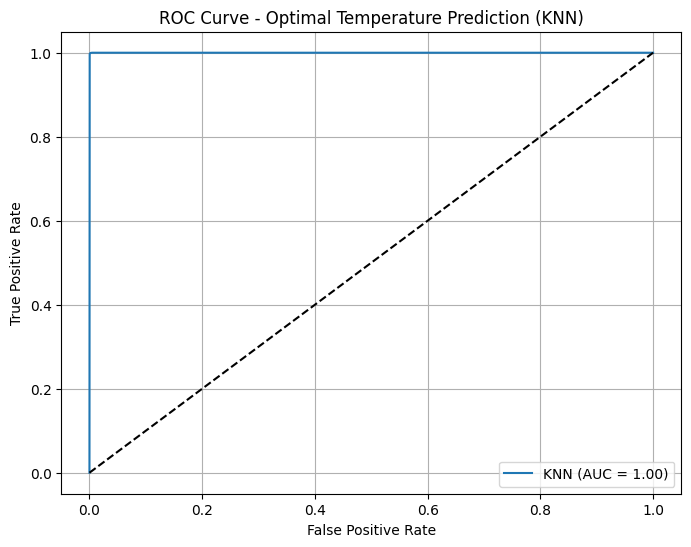

In [ ]:
# 🔁 Cross-validation setup
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 📈 ROC Plot Function
from sklearn.metrics import roc_curve, auc, accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

def plot_roc(model, X_test, y_test, label):
    y_probs = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_probs)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{label} (AUC = {roc_auc:.2f})')
    return roc_auc

# 🧠 Model Training – KNN
from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier(n_neighbors=5)
model_knn.fit(X_train, y_train)
y_pred_knn = model_knn.predict(X_test)

# 🧾 Evaluation
print("🔹 KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

cv_acc = cross_val_score(model_knn, X_scaled, y, cv=skf, scoring='accuracy')
print(f"🔁 Cross-Validation Accuracy: {cv_acc.mean():.4f} ± {cv_acc.std():.4f}")

# 📊 ROC Curve
plt.figure(figsize=(8,6))
plot_roc(model_knn, X_test, y_test, 'KNN')
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve - Optimal Temperature Prediction (KNN)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid()
plt.show()

🔹 SVM Accuracy: 0.9972963279719701
[[14121    94]
 [    4 22028]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     14215
           1       1.00      1.00      1.00     22032

    accuracy                           1.00     36247
   macro avg       1.00      1.00      1.00     36247
weighted avg       1.00      1.00      1.00     36247

🔁 Cross-Validation Accuracy: 0.9973 ± 0.0002


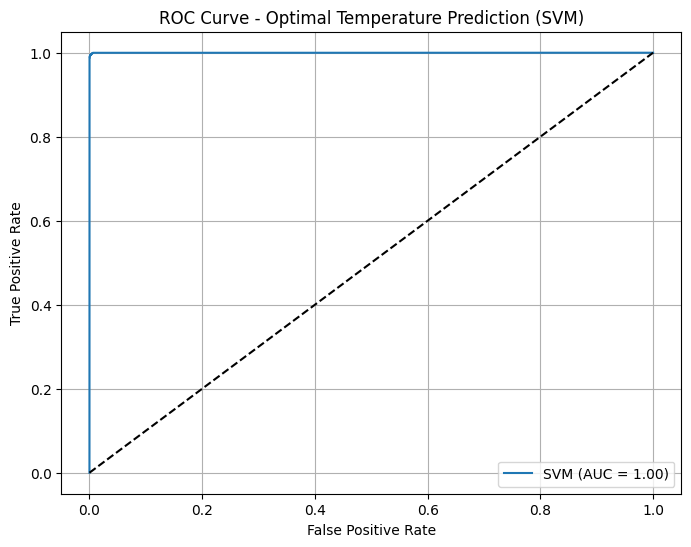

In [ ]:
# 🧠 Model Training – SVM
from sklearn.svm import SVC

model_svm = SVC(kernel='rbf', probability=True)
model_svm.fit(X_train, y_train)
y_pred_svm = model_svm.predict(X_test)

# 🧾 Evaluation
print("🔹 SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print(confusion_matrix(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

cv_acc = cross_val_score(model_svm, X_scaled, y, cv=skf, scoring='accuracy')
print(f"🔁 Cross-Validation Accuracy: {cv_acc.mean():.4f} ± {cv_acc.std():.4f}")

# 📊 ROC Curve
plt.figure(figsize=(8,6))
plot_roc(model_svm, X_test, y_test, 'SVM')
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve - Optimal Temperature Prediction (SVM)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid()
plt.show()

🔹 Logistic Regression Accuracy: 0.6619858195160979
[[ 2020 12195]
 [   57 21975]]
              precision    recall  f1-score   support

           0       0.97      0.14      0.25     14215
           1       0.64      1.00      0.78     22032

    accuracy                           0.66     36247
   macro avg       0.81      0.57      0.51     36247
weighted avg       0.77      0.66      0.57     36247

🔁 Cross-Validation Accuracy: 0.6661 ± 0.0022


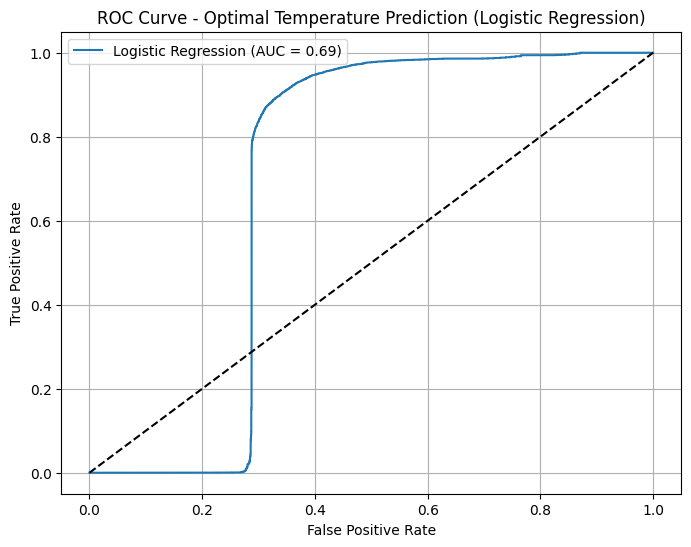

In [ ]:
# 🧠 Model Training – Logistic Regression
from sklearn.linear_model import LogisticRegression

model_logreg = LogisticRegression(max_iter=1000, solver='liblinear')
model_logreg.fit(X_train, y_train)
y_pred_logreg = model_logreg.predict(X_test)

# 🧾 Evaluation
print("🔹 Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_logreg))
print(confusion_matrix(y_test, y_pred_logreg))
print(classification_report(y_test, y_pred_logreg))

cv_acc = cross_val_score(model_logreg, X_scaled, y, cv=skf, scoring='accuracy')
print(f"🔁 Cross-Validation Accuracy: {cv_acc.mean():.4f} ± {cv_acc.std():.4f}")

# 📊 ROC Curve
plt.figure(figsize=(8,6))
plot_roc(model_logreg, X_test, y_test, 'Logistic Regression')
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve - Optimal Temperature Prediction (Logistic Regression)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid()
plt.show()

🔹 Decision Tree Accuracy: 1.0
[[14215     0]
 [    0 22032]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14215
           1       1.00      1.00      1.00     22032

    accuracy                           1.00     36247
   macro avg       1.00      1.00      1.00     36247
weighted avg       1.00      1.00      1.00     36247

🔁 Cross-Validation Accuracy: 1.0000 ± 0.0000


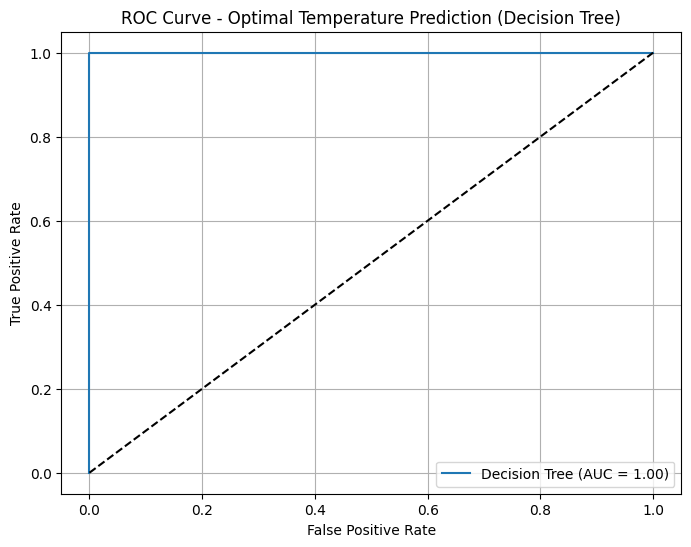

In [ ]:
# 🧠 Model Training – Decision Tree
from sklearn.tree import DecisionTreeClassifier

model_dt = DecisionTreeClassifier(random_state=42)
model_dt.fit(X_train, y_train)
y_pred_dt = model_dt.predict(X_test)

# 🧾 Evaluation
print("🔹 Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print(confusion_matrix(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

cv_acc = cross_val_score(model_dt, X_scaled, y, cv=skf, scoring='accuracy')
print(f"🔁 Cross-Validation Accuracy: {cv_acc.mean():.4f} ± {cv_acc.std():.4f}")

# 📊 ROC Curve
plt.figure(figsize=(8,6))
plot_roc(model_dt, X_test, y_test, 'Decision Tree')
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve - Optimal Temperature Prediction (Decision Tree)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid()
plt.show()

🔹 Random Forest Accuracy: 0.9999448230198361
[[14213     2]
 [    0 22032]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14215
           1       1.00      1.00      1.00     22032

    accuracy                           1.00     36247
   macro avg       1.00      1.00      1.00     36247
weighted avg       1.00      1.00      1.00     36247

🔁 Cross-Validation Accuracy: 1.0000 ± 0.0000


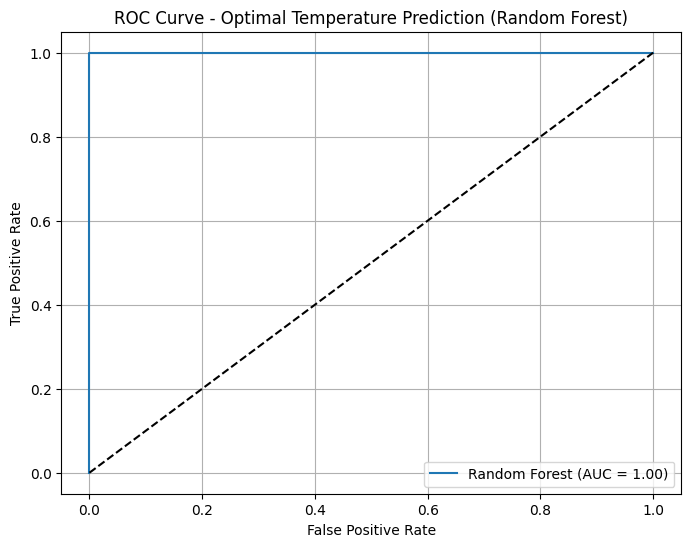

In [ ]:
# 🧠 Model Training – Random Forest
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)

# 🧾 Evaluation
print("🔹 Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

cv_acc = cross_val_score(model_rf, X_scaled, y, cv=skf, scoring='accuracy')
print(f"🔁 Cross-Validation Accuracy: {cv_acc.mean():.4f} ± {cv_acc.std():.4f}")

# 📊 ROC Curve
plt.figure(figsize=(8,6))
plot_roc(model_rf, X_test, y_test, 'Random Forest')
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve - Optimal Temperature Prediction (Random Forest)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid()
plt.show()

Comparative Analysis

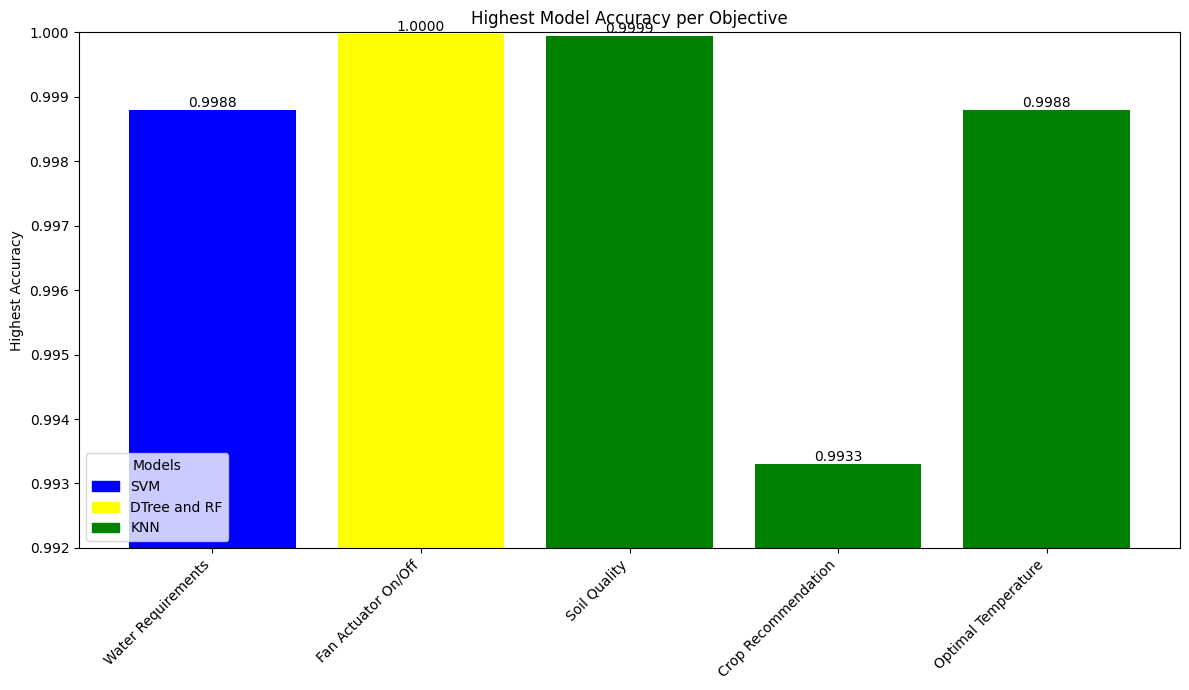

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Patch

objectives = [
    'Water Requirements',
    'Fan Actuator On/Off',
    'Soil Quality',
    'Crop Recommendation',
    'Optimal Temperature'
]

# Extracting the highest accuracies from the notebook outputs
accuracies = [
    0.9988, # SVM for water requirements (from cell RuVYPJo0QfjH output)
    0.99997, # DTree and RF for fan actuator (from cells e5f5d64d and 785dd503 output)
    0.99994, # KNN for soil quality (from cell 2dee8280 output)
    0.9933, # KNN for crop recommendation (from cell 9IJZwdaMLwH8 output)
    0.9988 # KNN for optimal temperature (from cell 4a3b9040 output)
]

# Define colors as requested by the user
colors = ['blue', 'yellow', 'green', 'green', 'green']

plt.figure(figsize=(12, 7))
bars = plt.bar(objectives, accuracies, color=colors)

# Add accuracy values on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, f'{yval:.4f}', va='bottom', ha='center')

plt.ylim(0.992, 1.0) # Set y-axis limits to focus on high accuracies
plt.ylabel('Highest Accuracy')
plt.title('Highest Model Accuracy per Objective')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Create custom legend handles
legend_handles = [
    Patch(color='blue', label='SVM'),
    Patch(color='yellow', label='DTree and RF'),
    Patch(color='green', label='KNN')
]

# Add the legend to the plot
plt.legend(handles=legend_handles, title="Models")

plt.show()